In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('../sale-prediction/sales_train.csv', parse_dates=['date'])
test = pd.read_csv('../sale-prediction/test.csv')
sub = pd.read_csv('../sale-prediction/sample_submission.csv')

item_categories = pd.read_csv('../sale-prediction/item_categories.csv')
items = pd.read_csv('../sale-prediction/items.csv')
shops = pd.read_csv('../sale-prediction/shops.csv')

In [3]:
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-10-01,0,25,2564,349.00,1.0
6,2013-02-01,0,25,2565,549.00,1.0
7,2013-04-01,0,25,2572,239.00,1.0
8,2013-11-01,0,25,2572,299.00,1.0
9,2013-03-01,0,25,2573,299.00,3.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [5]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [182]:
train.iloc[:,0].isnull().value_counts()

False    2935849
Name: date, dtype: int64

In [183]:
for i in range(0,6):
    null = train.iloc[:,i].isnull().value_counts()
    print(null)

False    2935849
Name: date, dtype: int64
False    2935849
Name: date_block_num, dtype: int64
False    2935849
Name: shop_id, dtype: int64
False    2935849
Name: item_id, dtype: int64
False    2935849
Name: item_price, dtype: int64
False    2935849
Name: item_cnt_day, dtype: int64


In [184]:
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [185]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [186]:
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [187]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [188]:
item_categories.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [189]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [190]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [191]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [192]:
item_categories[item_categories['item_category_id'] == 40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [193]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [194]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## 年別

In [196]:
train['year'] = train.date.apply(lambda x: x.year) #　約10秒

In [198]:
year0 = train.date[0].year
year0

2013

In [199]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
0,2013-02-01,0,59,22154,999.00,1.0,2013
1,2013-03-01,0,25,2552,899.00,1.0,2013
2,2013-05-01,0,25,2552,899.00,-1.0,2013
3,2013-06-01,0,25,2554,1709.05,1.0,2013
4,2013-01-15,0,25,2555,1099.00,1.0,2013


Text(0.5, 1.0, '年別の購買回数')

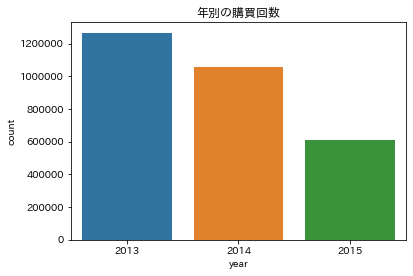

In [200]:
sns.countplot(x='year', data=train).set_title('年別の購買回数')

Text(0.5, 1.0, '年別の売り上げ')

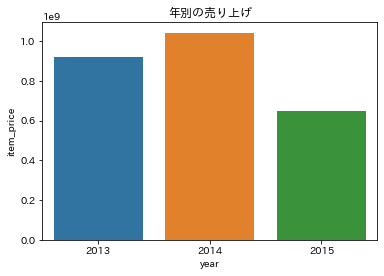

In [201]:
train_per_year = train.groupby('year').sum().reset_index()
sns.barplot(x='year',y='item_price', data=train_per_year).set_title('年別の売り上げ')

Text(0.5, 1.0, '1回の購買における購入価格')

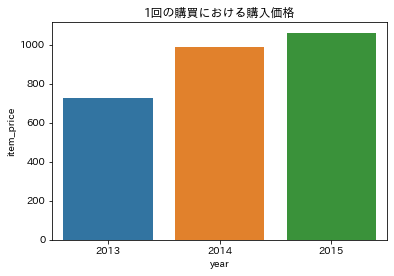

In [202]:
train_year = train.groupby('year').mean().reset_index()
sns.barplot(x='year',y='item_price',data=train_year).set_title('1回の購買における購入価格')

## item_cnt_dayについて

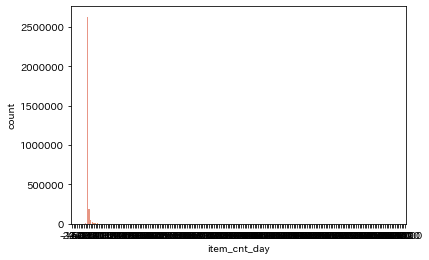

In [203]:
sns.countplot(x='item_cnt_day', data=train) 
#多くが１つで販売されているが、それ以外の個数での販売も多数ある

## dateblock別（毎月）

Text(0.5, 1.0, '毎月の購買回数')

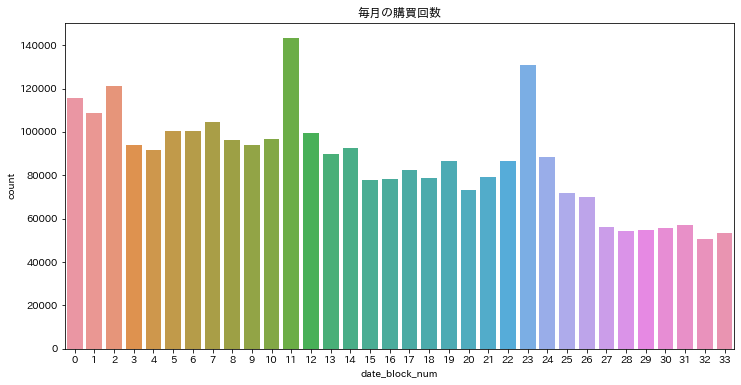

In [204]:
plt.figure(figsize=(12,6))
sns.countplot(x='date_block_num',data=train).set_title('毎月の購買回数')

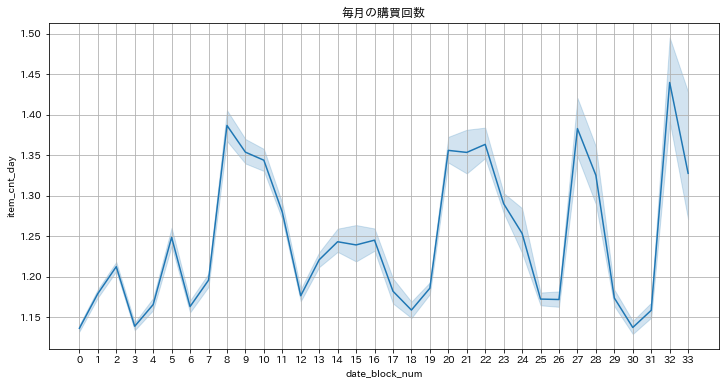

In [205]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num',y='item_cnt_day',data=train).set_title('毎月の購買回数')
plt.xticks(np.arange(0,34))
plt.grid(True)

In [206]:
train['total_price'] = train.item_price * train.item_cnt_day

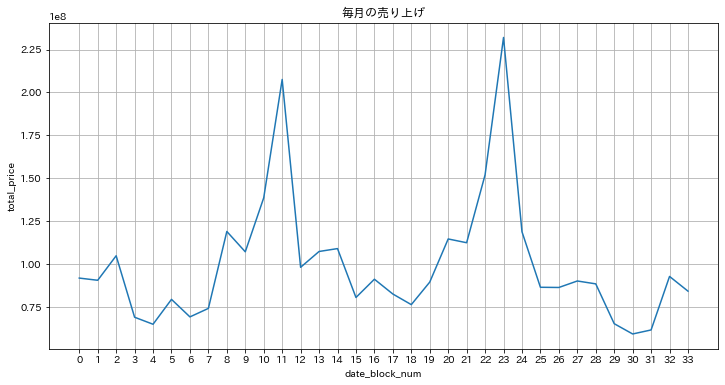

In [207]:
train_groupby_month = train.groupby('date_block_num').sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num', y='total_price', data=train_groupby_month).set_title('毎月の売り上げ')
plt.xticks(np.arange(0,34))
plt.grid(True)

In [208]:
train.date_block_num.value_counts().sort_index()

0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
Name: date_block_num, dtype: int64

In [209]:
train_groupby_month #date_block_numごとの「合計」

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07
5,5,3364700,1047351238,6.334361e+07,125381.0,202111239,7.955041e+07
6,6,3376156,1067060380,6.219681e+07,116966.0,202403124,6.935060e+07
7,7,3510787,1065970958,6.543817e+07,125291.0,210906036,7.429797e+07
8,8,3208314,957871641,7.270157e+07,133332.0,193523781,1.190819e+08
9,9,3101078,966066011,7.391497e+07,127541.0,189628626,1.072416e+08


In [210]:
train_groupby_month['month_count'] = train['date_block_num'].value_counts().sort_index()
train_groupby_month['total_price_mean'] = train_groupby_month['total_price'] / train_groupby_month['month_count']
train_groupby_month

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,month_count,total_price_mean
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07,115690,794.771295
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07,108613,834.759259
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08,121347,864.732438
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07,94109,734.831797
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07,91759,709.089162
5,5,3364700,1047351238,6.334361e+07,125381.0,202111239,7.955041e+07,100403,792.311045
6,6,3376156,1067060380,6.219681e+07,116966.0,202403124,6.935060e+07,100548,689.726299
7,7,3510787,1065970958,6.543817e+07,125291.0,210906036,7.429797e+07,104772,709.139557
8,8,3208314,957871641,7.270157e+07,133332.0,193523781,1.190819e+08,96137,1238.668688
9,9,3101078,966066011,7.391497e+07,127541.0,189628626,1.072416e+08,94202,1138.421823


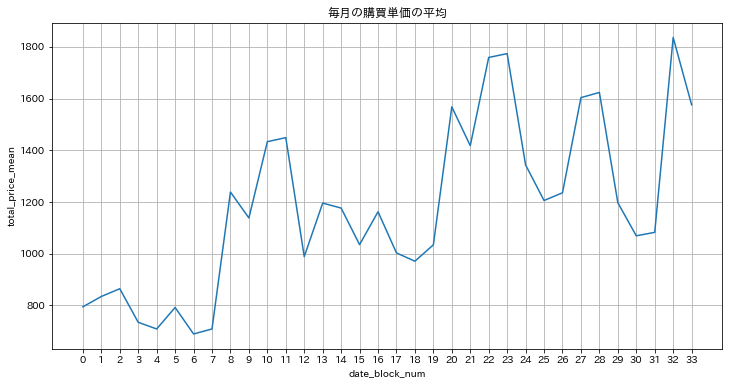

In [211]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date_block_num', y='total_price_mean', data=train_groupby_month).set_title('毎月の購買単価の平均')
plt.xticks(np.arange(0,34))
plt.grid(True)

## 各月ごとに集計(1月,2月,,,)

In [212]:
train_groupby_month['month'] = train_groupby_month.date_block_num.mod(12) + 1

In [213]:
train_groupby_month.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,month_count,total_price_mean,month
0,0,3417068,1183971787,8.221187e+07,131479.0,232883970,9.194709e+07,115690,794.771295,1
1,1,3111582,1076043980,7.558019e+07,128090.0,218637969,9.066571e+07,108613,834.759259,2
2,2,4016457,1220911622,8.429831e+07,147142.0,244271511,1.049327e+08,121347,864.732438,3
3,3,3164978,971345965,6.151282e+07,107190.0,189441417,6.915429e+07,94109,734.831797,4
4,4,3093999,950372988,5.727413e+07,106970.0,184710867,6.506531e+07,91759,709.089162,5


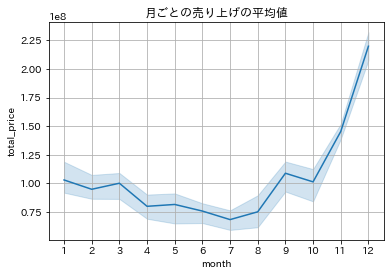

In [214]:
sns.lineplot(x='month',
            y='total_price', 
            data=train_groupby_month).set_title('月ごとの売り上げの平均値')
plt.xticks(np.arange(1,13))
plt.grid(True)

## 曜日別

In [215]:
train['date'] = pd.to_datetime(train['date'])

In [216]:
train['week_day'] = train['date'].apply(lambda x: x.dayofweek)
train.head() # 約1分

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
0,2013-02-01,0,59,22154,999.00,1.0,2013,999.00,4
1,2013-03-01,0,25,2552,899.00,1.0,2013,899.00,4
2,2013-05-01,0,25,2552,899.00,-1.0,2013,-899.00,2
3,2013-06-01,0,25,2554,1709.05,1.0,2013,1709.05,5
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1099.00,1


Text(0.5, 1.0, '曜日別購買回数')

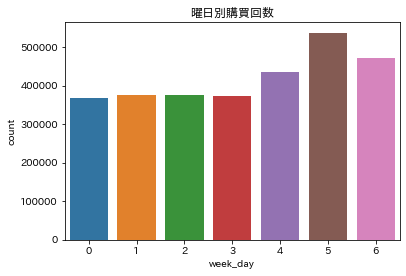

In [217]:
sns.countplot(x='week_day', data=train).set_title('曜日別購買回数') 

Text(0.5, 1.0, '曜日ごとの売り上げ')

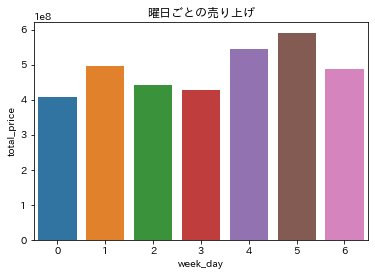

In [218]:
train_groupby_weekday = train.groupby('week_day').sum().reset_index()
sns.barplot(x='week_day', y='total_price', data=train_groupby_weekday).set_title('曜日ごとの売り上げ')

Text(0.5, 1.0, '曜日ごとの購買単価')

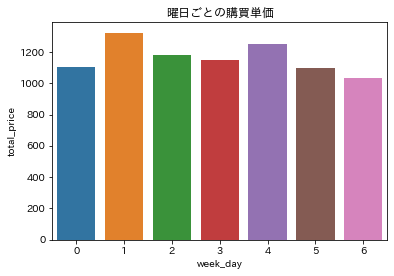

In [219]:
train_groupby_weekday_mean= train.groupby('week_day').mean().reset_index()
sns.barplot(x='week_day', y='total_price', data=train_groupby_weekday_mean).set_title('曜日ごとの購買単価')

## 祝日の処理

In [ ]:
public_holidays = [] # ここにその年ごとの祝日を打ち込むしかないのだろうか、、、

# itemについて見てみる

In [220]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
0,2013-02-01,0,59,22154,999.00,1.0,2013,999.00,4
1,2013-03-01,0,25,2552,899.00,1.0,2013,899.00,4
2,2013-05-01,0,25,2552,899.00,-1.0,2013,-899.00,2
3,2013-06-01,0,25,2554,1709.05,1.0,2013,1709.05,5
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1099.00,1


In [221]:
train.item_id.value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [329]:
items.item_name.to_csv('item_name.csv', index=False)

## 一番売れている商品

In [222]:
items.loc[items.item_id == 20949] #シャツ…？

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [223]:
item_categories.loc[item_categories.item_category_id == 71]

,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


In [224]:
shirts = train.loc[train.item_id == 20949]
shirts.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
352379,2013-04-30,3,22,20949,5.000000,12.0,2013,60.0,1
352399,2013-04-29,3,22,20949,4.923077,13.0,2013,64.0,0
352400,2013-04-28,3,22,20949,5.000000,4.0,2013,20.0,6
352401,2013-04-27,3,22,20949,5.000000,4.0,2013,20.0,5
352455,2013-04-24,3,22,20949,5.000000,2.0,2013,10.0,2


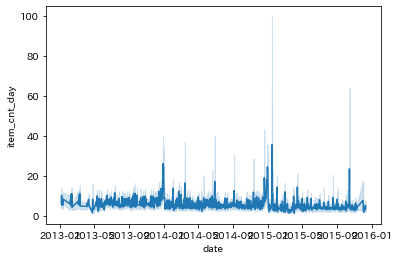

In [225]:
sns.lineplot(x='date', y='item_cnt_day', data=shirts) #一番売れた商品の個数の推移

## 商品ごとにグルーピング

In [226]:
item_group = train.groupby('item_id').sum().reset_index()
item_group

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
0,0,20,54,58.00,1.0,2014,58.00,3
1,1,108,330,26940.00,6.0,12084,26940.00,17
2,2,41,108,116.00,2.0,4028,116.00,9
3,3,37,108,158.00,2.0,4028,158.00,3
4,4,20,54,58.00,1.0,2014,58.00,4
...,...,...,...,...,...,...,...,...
21802,22165,23,110,118.00,2.0,4027,118.00,6
21803,22166,5042,14850,40500.00,348.0,543797,52200.00,750
21804,22167,20442,29872,331622.75,1320.0,2243628,393108.75,3288
21805,22168,12,127,4793.50,6.0,12078,4793.50,27


In [124]:
train.groupby('item_id', as_index=False).sum()[['item_price', 'item_cnt_day']]


,item_price,item_cnt_day
0,58.00,1.0
1,26940.00,6.0
2,116.00,2.0
3,158.00,2.0
4,58.00,1.0
...,...,...
21802,118.00,2.0
21803,40500.00,348.0
21804,331622.75,1320.0
21805,4793.50,6.0


In [227]:
item_group.sort_values('item_cnt_day', ascending=False) #売りが上回っている商品もある

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
20602,20949,554196,991373,1.540316e+05,187642.0,63118215,9.288637e+05,95577
2749,2808,87656,229967,7.475887e+06,17245.0,15059455,1.685278e+07,23368
3654,3732,96917,201958,1.756505e+07,16642.0,13038824,4.361798e+07,20718
17418,17717,203956,273979,9.924972e+06,15830.0,18264497,1.720083e+07,28522
5717,5822,158305,296575,9.984311e+06,14515.0,18947537,1.540898e+07,29302
...,...,...,...,...,...,...,...,...
7401,7547,36,108,6.780000e+03,0.0,4028,0.000000e+00,6
13223,13474,7,42,1.039800e+04,-1.0,2013,-1.039800e+04,4
17760,18062,1,16,4.999000e+03,-1.0,2013,-4.999000e+03,6
11664,11871,0,16,5.999000e+03,-1.0,2013,-5.999000e+03,0


In [228]:
sort_cnt = item_group.sort_values('item_cnt_day', ascending=False)

items_ = items.loc[items.item_id == 20949]
for i in range(1,101):
    large_cnt_items = sort_cnt.iloc[i,0]
    items_l = items.loc[items.item_id == large_cnt_items]
    best100_items = pd.concat([best100_items,items_l], sort=False) #ここの書き方がよくわからない
best100_items

,item_name,item_id,item_category_id,item_name_en
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,NaN
20608,Фигурка Minecraft Series 1 Player Survival Pac...,20608,72,NaN
2808,"Diablo III [PC, Jewel, русская версия]",2808,30,NaN
3732,"Grand Theft Auto V [PS3, русские субтитры]",3732,19,NaN
17717,Прием денежных средств для 1С-Онлайн,17717,79,NaN
...,...,...,...,...
5663,PS4: Камера (PlayStation Camera: CUH-ZEY1: SCEE),5663,3,NaN
7805,"Watch_Dogs. Специальное издание [PC, русская в...",7805,28,NaN
16056,Настольная игра World of Tanks Rush арт.1123,16056,64,NaN
3432,"Far Cry 3 [PC, Jewel, русская версия]",3432,30,NaN


In [229]:
best100_items.head(20)

,item_name,item_id,item_category_id,item_name_en
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,NaN
20608,Фигурка Minecraft Series 1 Player Survival Pac...,20608,72,NaN
2808,"Diablo III [PC, Jewel, русская версия]",2808,30,NaN
3732,"Grand Theft Auto V [PS3, русские субтитры]",3732,19,NaN
17717,Прием денежных средств для 1С-Онлайн,17717,79,NaN
5822,Playstation Store пополнение бумажника: Карта ...,5822,35,NaN
3734,"Grand Theft Auto V [Xbox 360, русские субтитры]",3734,23,NaN
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,12,NaN
3731,"Grand Theft Auto V [PC, русские субтитры]",3731,30,NaN
1855,"Battlefield 4 [PC, русская версия]",1855,30,NaN


In [230]:
best100_items['item_name'].to_csv('best100_items.csv', index=False)

In [231]:
best100_items_en = pd.read_csv('../sale-prediction/best100_items_en.csv')#翻訳後のもの

In [232]:
best100_items_en

,item_name
0,Corporate package shirt 1C Interest white (34 ...
1,"""Minecraft Series 1 Player Survival Pack 3 Fig..."
2,"""Diablo III [PC, Jewel, Russian version]"""
3,"""Grand Theft Auto V [PS3, Russian subtitles]"""
4,Acceptance of funds for 1C-Online
...,...
92,"""UFC [PS4, English version]"""
93,"""Myal-toy"" ""Angry birds"" ""in assortment (1 pc.)"""
94,"""S.T.A.L.K.E.R .: Call of Pripyat [PC, Jewel, ..."
95,Assassin's Creed IV. Black flag. Collector's E...


In [233]:
best100_items.item_category_id.value_counts()

30    68
28    30
20    18
23    16
19    14
35     8
40     6
3      6
65     4
70     4
75     4
9      4
6      4
83     4
72     3
64     2
79     2
12     2
8      2
71     1
Name: item_category_id, dtype: int64

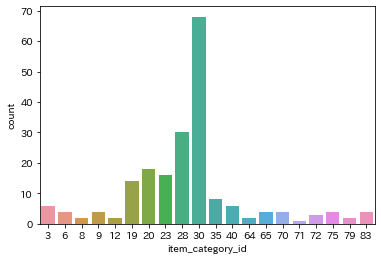

In [234]:
sns.countplot(x='item_category_id',data=best100_items)

In [235]:
item_categories.loc[item_categories['item_category_id'] == 30] #PC Games - Standard Editions

,item_category_name,item_category_id
30,Игры PC - Стандартные издания,30


In [236]:
item_categories.loc[item_categories['item_category_id'] == 28] #PC Games - Additional Editions

,item_category_name,item_category_id
28,Игры PC - Дополнительные издания,28


In [237]:
item_categories.loc[item_categories['item_category_id'] == 20] #Games - PS4

,item_category_name,item_category_id
20,Игры - PS4,20


In [238]:
item_categories.loc[item_categories['item_category_id'] == 23] #Games - XBOX 360

,item_category_name,item_category_id
23,Игры - XBOX 360,23


In [239]:
item_categories.loc[item_categories['item_category_id'] == 19] #Games - PS3

,item_category_name,item_category_id
19,Игры - PS3,19


In [240]:
item_categories.loc[item_categories['item_category_id'] == 35] #Payment Cards - PSN

,item_category_name,item_category_id
35,Карты оплаты - PSN,35


In [241]:
train.loc[train.item_id == 2808] #standard edisionsの例

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
91,2013-02-01,0,25,2808,999.0,2.0,2013,1998.0,4
92,2013-03-01,0,25,2808,999.0,2.0,2013,1998.0,4
93,2013-04-01,0,25,2808,999.0,1.0,2013,999.0,0
94,2013-07-01,0,25,2808,999.0,1.0,2013,999.0,0
95,2013-08-01,0,25,2808,999.0,2.0,2013,1998.0,3
...,...,...,...,...,...,...,...,...,...
2924805,2015-12-10,33,26,2808,1499.0,1.0,2015,1499.0,3
2928833,2015-10-18,33,24,2808,1499.0,1.0,2015,1499.0,6
2934603,2015-10-10,33,25,2808,1499.0,1.0,2015,1499.0,5
2934604,2015-06-10,33,25,2808,1499.0,1.0,2015,1499.0,2


In [242]:
train.loc[train.item_id == 2814] #aditional edisionsの例

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
1551364,2014-04-30,15,56,2814,899.0,1.0,2014,899.0,2
1551366,2014-04-28,15,56,2814,899.0,1.0,2014,899.0,0
1551367,2014-04-22,15,56,2814,899.0,1.0,2014,899.0,1
1551368,2014-04-20,15,56,2814,899.0,2.0,2014,1798.0,6
1551369,2014-04-19,15,56,2814,899.0,4.0,2014,3596.0,5
...,...,...,...,...,...,...,...,...,...
2453961,2015-12-02,25,24,2814,899.0,1.0,2015,899.0,2
2473208,2015-02-18,25,30,2814,719.0,1.0,2015,719.0,2
2476903,2015-05-02,25,25,2814,899.0,1.0,2015,899.0,5
2483116,2015-07-02,25,27,2814,899.0,1.0,2015,899.0,3


## 12月に売れているアイテムは？

In [243]:
train_12 = train.loc[train.date_block_num.mod(12) == 11]

In [244]:
items_12 = train_12.groupby('item_id').sum().reset_index()
items_12.sort_values('item_cnt_day', ascending=False)

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
11086,20949,42760,79983,1.228552e+04,24742.0,5041820,1.223175e+05,7705
3370,6675,9244,22111,1.657748e+07,2171.0,1441422,5.047452e+07,2083
9322,17717,20908,29010,1.190429e+06,2094.0,1901149,2.580672e+06,3004
794,1855,13818,31740,9.441887e+05,1965.0,1968969,1.846176e+06,3019
1796,3732,11564,27681,2.324173e+06,1561.0,1699162,4.216683e+06,2618
...,...,...,...,...,...,...,...,...
10293,19493,23,12,1.549000e+03,-1.0,2014,-1.549000e+03,5
5164,10156,23,42,7.499000e+03,-1.0,2014,-7.499000e+03,2
3451,6850,23,17,1.199900e+04,-1.0,2014,-1.199900e+04,6
11194,21299,11,12,1.299000e+03,-1.0,2013,-1.299000e+03,1


In [245]:
best100_items_12 = items_12.sort_values('item_cnt_day', ascending=False).iloc[:101, [0, 4]]
best100_items_12 = pd.merge(best100_items_12, items, on='item_id')
best100_items_12.head()

,item_id,item_cnt_day,item_name,item_category_id
0,20949,24742.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71
1,6675,2171.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12
2,17717,2094.0,Прием денежных средств для 1С-Онлайн,79
3,1855,1965.0,"Battlefield 4 [PC, русская версия]",30
4,3732,1561.0,"Grand Theft Auto V [PS3, русские субтитры]",19


In [246]:
best100_items_12.item_category_id.value_counts()

20    12
28    12
30    12
19    12
23     9
40     7
3      5
35     4
69     4
6      2
55     2
65     2
12     2
70     2
75     2
7      1
16     1
9      1
83     1
31     1
79     1
37     1
62     1
63     1
64     1
71     1
2      1
Name: item_category_id, dtype: int64

In [247]:
item_categories.loc[item_categories['item_category_id'] == 20] #Games - PS4

,item_category_name,item_category_id
20,Игры - PS4,20


In [248]:
item_categories.loc[item_categories['item_category_id'] == 28] #PC Games - Additional Editions

,item_category_name,item_category_id
28,Игры PC - Дополнительные издания,28


In [249]:
item_categories.loc[item_categories['item_category_id'] == 30] #PC Games - Standard Editions

,item_category_name,item_category_id
30,Игры PC - Стандартные издания,30


In [250]:
item_categories.loc[item_categories['item_category_id'] == 19] #Games - PS3

,item_category_name,item_category_id
19,Игры - PS3,19


In [251]:
item_categories.loc[item_categories['item_category_id'] == 23] #Games - XBOX 360

,item_category_name,item_category_id
23,Игры - XBOX 360,23


In [252]:
item_categories.loc[item_categories['item_category_id'] == 40] #Cinema - DVD

,item_category_name,item_category_id
40,Кино - DVD,40


## priceとitem_cnt_dayには負の相関があるのではないか

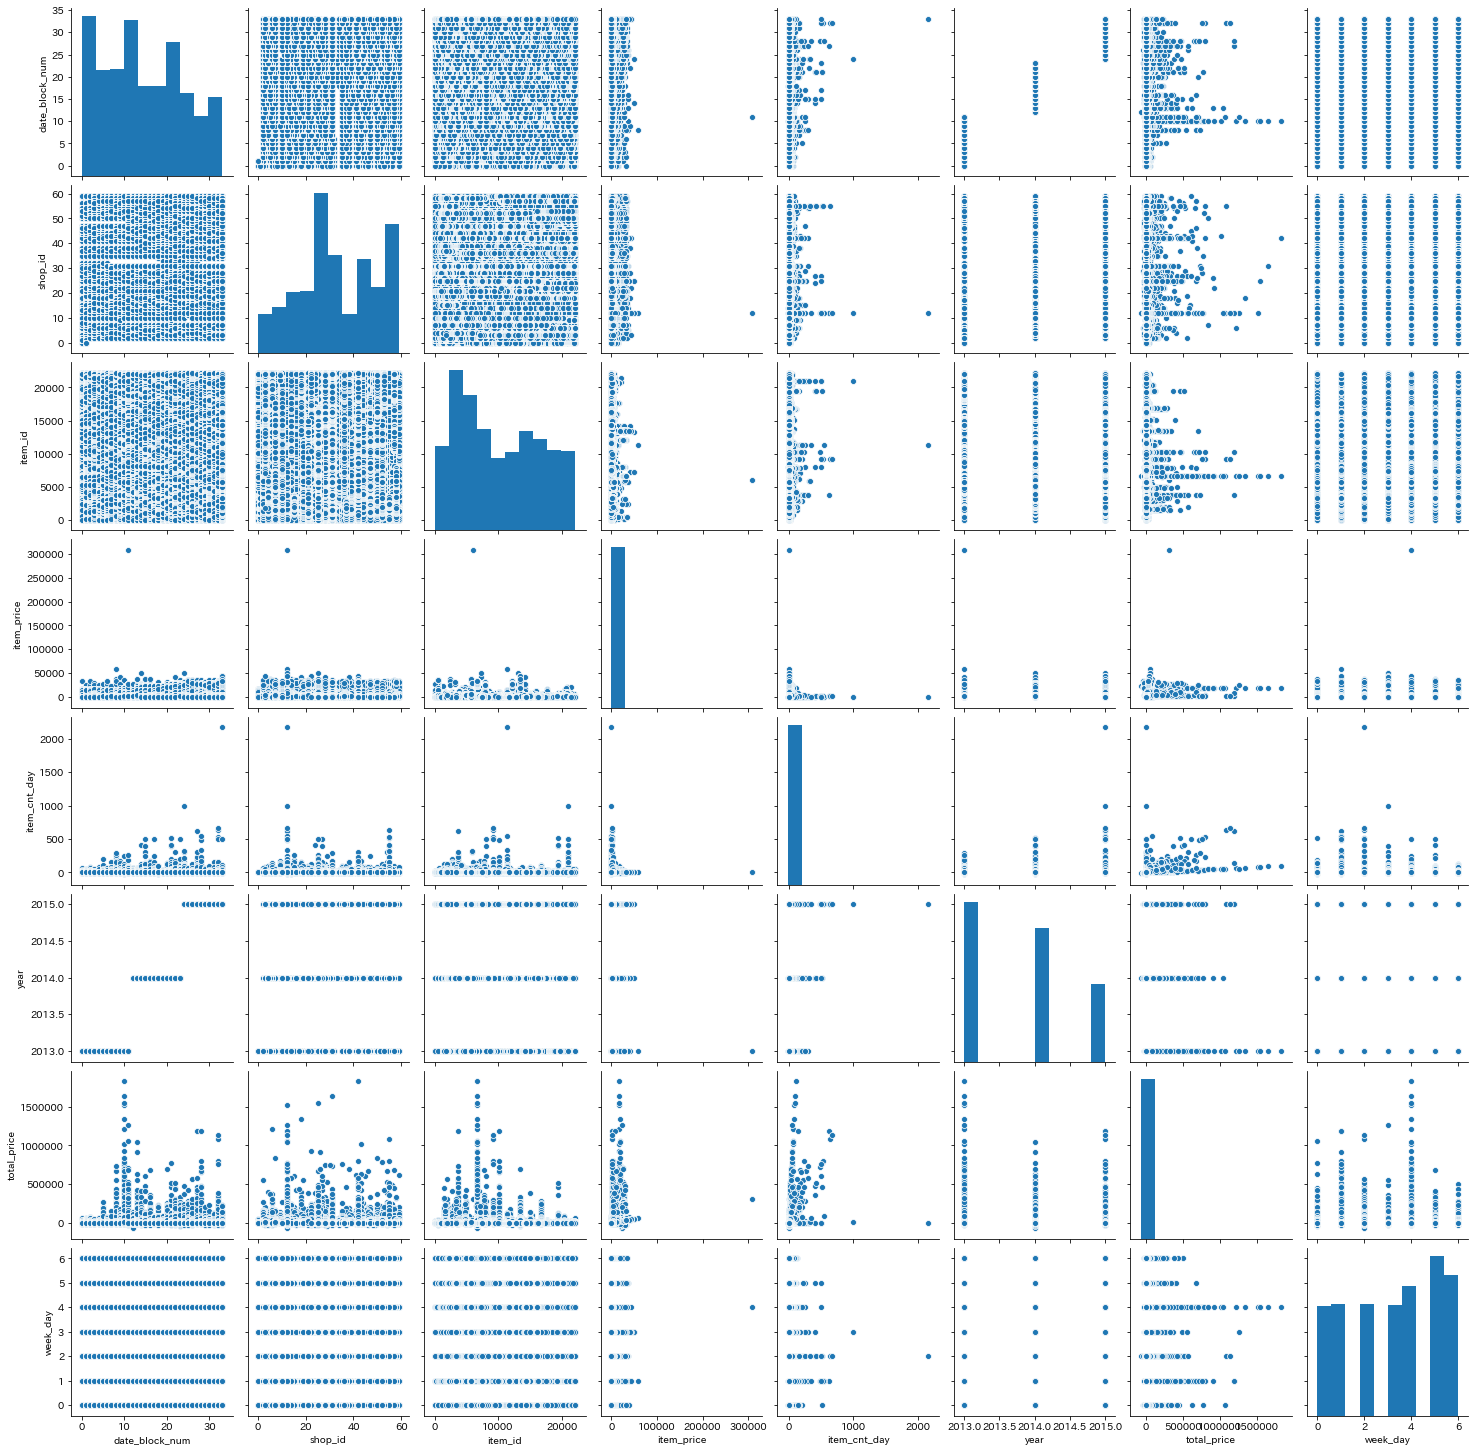

In [105]:
sns.pairplot(train) #40分かかった #全然必要なかった

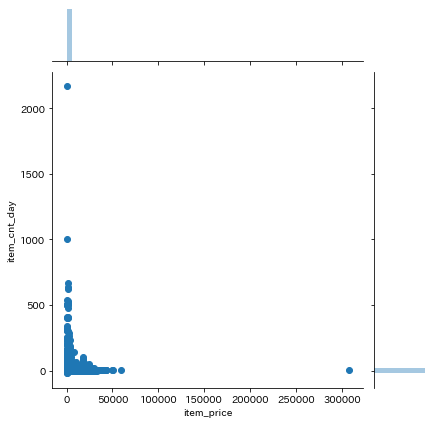

In [253]:
sns.jointplot('item_price', 'item_cnt_day', data=train)

In [254]:
train.iloc[train.item_price.idxmax(),:]

date              2013-12-13 00:00:00
date_block_num                     11
shop_id                            12
item_id                          6066
item_price                     307980
item_cnt_day                        1
year                             2013
total_price                    307980
week_day                            4
Name: 1163158, dtype: object

In [255]:
items.loc[items.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [256]:
train.iloc[train.item_cnt_day.idxmax(),:]

date              2015-10-28 00:00:00
date_block_num                     33
shop_id                            12
item_id                         11373
item_price                   0.908714
item_cnt_day                     2169
year                             2015
total_price                      1971
week_day                            2
Name: 2909818, dtype: object

In [257]:
items.loc[items.item_id == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [258]:
items = items.merge(item_categories, on='item_category_id')
items.head()
#面倒なのでくっつけた

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


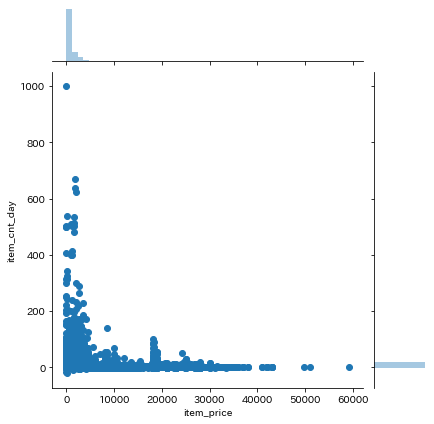

In [259]:
train_d = train.drop(train.index[[1163158, 2909818]])
sns.jointplot('item_price', 'item_cnt_day', data=train_d)

In [260]:
train_d.item_price.corr(train_d.item_cnt_day) #なかったけど、、、

0.013030052321694597

# shopに着目

In [261]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [262]:
shops['shop_name'].to_csv('shop_name.csv', index=False)

In [263]:
shop_name_en = pd.read_csv('../sale-prediction/shop_name_en.csv')
shops['shop_name_en'] = shop_name_en

In [264]:
shops

,shop_name,shop_id,shop_name_en
0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 franc"
1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk shopping center ""Central"" ""fran"""
2,"Адыгея ТЦ ""Мега""",2,"Adygea Shopping Center ""Mega"" """""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Balashikha shopping and entertainment complex ...
4,"Волжский ТЦ ""Волга Молл""",4,Volzhsky shopping center Volga Mall
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda shopping center ""Marmalade"" """""
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)"
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh shopping center ""Maximir"" """""
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Voronezh shopping and entertainment complex Ci...
9,Выездная Торговля,9,Outbound Trade


## 都市に注目

In [265]:
shops['shop_name_en'][0] = shops['shop_name_en'][0].replace('! ','')
shops['shop_name_en'][1] = shops['shop_name_en'][1].replace('! ','')

shops

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,shop_name,shop_id,shop_name_en
0,"!Якутск Орджоникидзе, 56 фран",0,"Yakutsk Ordzhonikidze, 56 franc"
1,"!Якутск ТЦ ""Центральный"" фран",1,"Yakutsk shopping center ""Central"" ""fran"""
2,"Адыгея ТЦ ""Мега""",2,"Adygea Shopping Center ""Mega"" """""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Balashikha shopping and entertainment complex ...
4,"Волжский ТЦ ""Волга Молл""",4,Volzhsky shopping center Volga Mall
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda shopping center ""Marmalade"" """""
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)"
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh shopping center ""Maximir"" """""
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Voronezh shopping and entertainment complex Ci...
9,Выездная Торговля,9,Outbound Trade


In [266]:
def get_city(x):
    city = x.split(' ')[0]
    return city
shops['city'] = shops.shop_name_en.apply(get_city)
shops['city'][[34,35]] = 'N.Novgorod'
shops

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,shop_name,shop_id,shop_name_en,city
0,"!Якутск Орджоникидзе, 56 фран",0,"Yakutsk Ordzhonikidze, 56 franc",Yakutsk
1,"!Якутск ТЦ ""Центральный"" фран",1,"Yakutsk shopping center ""Central"" ""fran""",Yakutsk
2,"Адыгея ТЦ ""Мега""",2,"Adygea Shopping Center ""Mega"" """"",Adygea
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Balashikha shopping and entertainment complex ...,Balashikha
4,"Волжский ТЦ ""Волга Молл""",4,Volzhsky shopping center Volga Mall,Volzhsky
5,"Вологда ТРЦ ""Мармелад""",5,"Vologda shopping center ""Marmalade"" """"",Vologda
6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)",Voronezh
7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh shopping center ""Maximir"" """"",Voronezh
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Voronezh shopping and entertainment complex Ci...,Voronezh
9,Выездная Торговля,9,Outbound Trade,Outbound


In [267]:
shop_city = shops[['shop_id','city']]
train = train.merge(shop_city, on='shop_id')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day,city
0,2013-02-01,0,59,22154,999.0,1.0,2013,999.0,4,Yaroslavl
1,2013-10-01,0,59,22151,399.0,1.0,2013,399.0,1,Yaroslavl
2,2013-04-01,0,59,5603,699.0,1.0,2013,699.0,0,Yaroslavl
3,2013-01-19,0,59,5587,199.0,2.0,2013,398.0,5,Yaroslavl
4,2013-01-31,0,59,5613,5571.0,1.0,2013,5571.0,3,Yaroslavl
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-30,33,36,20231,169.0,1.0,2015,169.0,4,Novosibirsk
2935845,2015-10-18,33,36,20334,1949.0,1.0,2015,1949.0,6,Novosibirsk
2935846,2015-10-31,33,36,20339,1549.0,1.0,2015,1549.0,5,Novosibirsk
2935847,2015-10-31,33,36,20352,1549.0,1.0,2015,1549.0,5,Novosibirsk


In [268]:
city_group = train.groupby('city').sum().reset_index()
city_group.sort_values('total_price', ascending=False)

,city,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
11,Moscow,14344082,27083137,10469783027,8.524512e+08,1276376.0,2006992625,1.132706e+09,3220043
18,SPb,2224781,6277752,1526550994,1.443030e+08,195542.0,299119259,2.141347e+08,464874
28,Yakutsk,2906646,10842652,2262901701,1.582587e+08,240857.0,411618161,1.916130e+08,644509
27,Voronezh,2028091,929806,1419222102,1.328617e+08,171142.0,290282709,1.673745e+08,461814
7,Khimki,1700597,7747920,1575568395,1.096694e+08,185790.0,288907966,1.419397e+08,491594
23,Tyumen,1721724,6301334,1311511019,1.035508e+08,142095.0,252630675,1.222967e+08,407255
4,Emergency,606604,416328,343178642,5.080559e+07,73478.0,69873487,1.122051e+08,78626
9,Krasnoyarsk,1042658,1348236,707835507,8.603810e+07,91324.0,153396792,1.111776e+08,248717
24,Ufa,1424770,5066917,918781252,8.557798e+07,111401.0,194175536,1.015653e+08,306917
13,N.Novgorod,1040760,2241143,618834747,6.451862e+07,75467.0,129286175,7.878760e+07,215271


## shopping center , online に注目

In [278]:
shops.shop_name_en.str.split(' ')[1][1] #shoppingをどうやって探したらいいんだ？

'shopping'

## shopごとの注文個数

In [283]:
shop_group = train.groupby('shop_id').sum().reset_index().merge(shop_city, on='shop_id')
shop_group.sort_values('item_cnt_day',ascending=False)

,shop_id,date_block_num,item_id,item_price,item_cnt_day,year,total_price,week_day,city
31,31,3519304,2613938432,1.707634e+08,310777.0,474525223,2.352170e+08,740559,Moscow
25,25,2803911,2017578669,1.555576e+08,241920.0,374779120,2.164806e+08,600345,Moscow
54,54,1700597,1575568395,1.096694e+08,185790.0,288907966,1.419397e+08,491594,Khimki
28,28,2106668,1503076500,1.252947e+08,184557.0,286431690,1.597463e+08,486422,Moscow
42,42,1762898,1149534465,1.015515e+08,144934.0,220024470,1.519170e+08,342837,SPb
57,57,1775086,1312813595,9.131521e+07,141107.0,236475744,1.129998e+08,372117,Yakutsk
27,27,1529193,1036482073,1.056489e+08,136657.0,212184965,1.406325e+08,361692,Moscow
6,6,1162512,821491791,7.455831e+07,100489.0,166461055,9.806745e+07,260475,Voronezh
58,58,1123512,784326072,5.846344e+07,81734.0,143870462,6.873762e+07,224156,Yakutsk
46,46,952426,655420158,6.093469e+07,78990.0,133554569,7.418932e+07,218035,Sergiev


In [284]:
shop_group.sort_values('total_price',ascending=False)

,shop_id,date_block_num,item_id,item_price,item_cnt_day,year,total_price,week_day,city
31,31,3519304,2613938432,1.707634e+08,310777.0,474525223,2.352170e+08,740559,Moscow
25,25,2803911,2017578669,1.555576e+08,241920.0,374779120,2.164806e+08,600345,Moscow
28,28,2106668,1503076500,1.252947e+08,184557.0,286431690,1.597463e+08,486422,Moscow
42,42,1762898,1149534465,1.015515e+08,144934.0,220024470,1.519170e+08,342837,SPb
54,54,1700597,1575568395,1.096694e+08,185790.0,288907966,1.419397e+08,491594,Khimki
27,27,1529193,1036482073,1.056489e+08,136657.0,212184965,1.406325e+08,361692,Moscow
57,57,1775086,1312813595,9.131521e+07,141107.0,236475744,1.129998e+08,372117,Yakutsk
12,12,606604,343178642,5.080559e+07,73478.0,69873487,1.122051e+08,78626,Emergency
6,6,1162512,821491791,7.455831e+07,100489.0,166461055,9.806745e+07,260475,Voronezh
18,18,716148,480096266,6.251643e+07,65486.0,107183519,8.339270e+07,174910,Krasnoyarsk


In [303]:
top3_shops = train[train['shop_id'].isin([31,25,28])]
top3_shops

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day,city
42108,2013-03-01,0,25,2552,899.00,1.0,2013,899.00,4,Moscow
42109,2013-05-01,0,25,2552,899.00,-1.0,2013,-899.00,2,Moscow
42110,2013-06-01,0,25,2554,1709.05,1.0,2013,1709.05,5,Moscow
42111,2013-01-15,0,25,2555,1099.00,1.0,2013,1099.00,1,Moscow
42112,2013-10-01,0,25,2564,349.00,1.0,2013,349.00,1,Moscow
...,...,...,...,...,...,...,...,...,...,...
1620789,2015-01-10,33,31,1540,1999.00,1.0,2015,1999.00,5,Moscow
1620790,2015-07-10,33,31,1540,1999.00,1.0,2015,1999.00,4,Moscow
1620791,2015-10-10,33,31,1540,1999.00,1.0,2015,1999.00,5,Moscow
1620792,2015-10-23,33,31,1484,1199.00,1.0,2015,1199.00,4,Moscow


In [304]:
top3_shops.item_id.value_counts()

20949    2530
5822     1327
17717    1014
7894      915
5823      869
         ... 
17953       1
17877       1
19608       1
5267        1
19228       1
Name: item_id, Length: 16716, dtype: int64

In [305]:
worst3_shops = train[train['shop_id'].isin([8,11,36])]
worst3_shops.item_id.value_counts()

20949    25
2808     21
12168    19
6495     19
3432     17
         ..
15013     1
11221     1
4780      1
10927     1
6147      1
Name: item_id, Length: 2430, dtype: int64

In [309]:
items[items.item_id.isin([5822,2808,17717,12168])]

,item_name,item_id,item_category_id,item_category_name
8506,"Diablo III [PC, Jewel, русская версия]",2808,30,Игры PC - Стандартные издания
18291,"Игрушка-мялка ""Сердитые птички"" в ассортименте...",12168,70,Подарки - Сувениры (в навеску)
20483,Playstation Store пополнение бумажника: Карта ...,5822,35,Карты оплаты - PSN
22151,Прием денежных средств для 1С-Онлайн,17717,79,Служебные


## 買いデータと売りデータ

In [316]:
train_buy = train.loc[train.item_cnt_day < 0]
train_buy.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day,city
107,2013-02-01,0,59,5856,2149.00,-1.0,2013,-2149.00,4,Yaroslavl
153,2013-01-30,0,59,4809,399.56,-1.0,2013,-399.56,2,Yaroslavl
544,2013-01-30,0,59,1874,199.44,-1.0,2013,-199.44,2,Yaroslavl
693,2013-09-01,0,59,4035,894.00,-1.0,2013,-894.00,6,Yaroslavl
1373,2013-10-01,0,59,12273,549.00,-1.0,2013,-549.00,1,Yaroslavl


In [317]:
train_sale = train.loc[train.item_cnt_day > 0]
train_sale.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day,city
0,2013-02-01,0,59,22154,999.0,1.0,2013,999.0,4,Yaroslavl
1,2013-10-01,0,59,22151,399.0,1.0,2013,399.0,1,Yaroslavl
2,2013-04-01,0,59,5603,699.0,1.0,2013,699.0,0,Yaroslavl
3,2013-01-19,0,59,5587,199.0,2.0,2013,398.0,5,Yaroslavl
4,2013-01-31,0,59,5613,5571.0,1.0,2013,5571.0,3,Yaroslavl


In [319]:
train_buy.count()

date              7356
date_block_num    7356
shop_id           7356
item_id           7356
item_price        7356
item_cnt_day      7356
year              7356
total_price       7356
week_day          7356
city              7356
dtype: int64

In [322]:
train_buy.item_id.value_counts()

2331     56
3734     41
1915     32
5672     31
16787    27
         ..
15269     1
6909      1
13052     1
2811      1
4102      1
Name: item_id, Length: 3511, dtype: int64

In [324]:
items.loc[items.item_id == 2331]

,item_name,item_id,item_category_id,item_category_name
17824,"Call of Duty: Ghosts [PS4, русская версия]",2331,20,Игры - PS4


In [325]:
items.loc[items.item_id == 3734]

,item_name,item_id,item_category_id,item_category_name
9338,"Grand Theft Auto V [Xbox 360, русские субтитры]",3734,23,Игры - XBOX 360


In [326]:
items.loc[items.item_id == 1915]

,item_name,item_id,item_category_id,item_category_name
8428,"Bestseller. S.T.A.L.K.E.R. [PC, Jewel]",1915,30,Игры PC - Стандартные издания


In [327]:
items.loc[items.item_id == 5672]

,item_name,item_id,item_category_id,item_category_name
20427,PS4: Контроллер игровой беспроводной черный (D...,5672,3,Аксессуары - PS4


In [328]:
items.loc[items.item_id == 16787]

,item_name,item_id,item_category_id,item_category_name
8328,"Одни из нас [PS3, русская версия]",16787,19,Игры - PS3
